In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.font_manager
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import class_weight
import scikitplot as skplt
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import classification_report, confusion_matrix
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
mpl.rcParams["figure.dpi"] = 96
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [23]:
data=pd.read_csv('usuarios_win_mac_lin_train.csv')
data.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


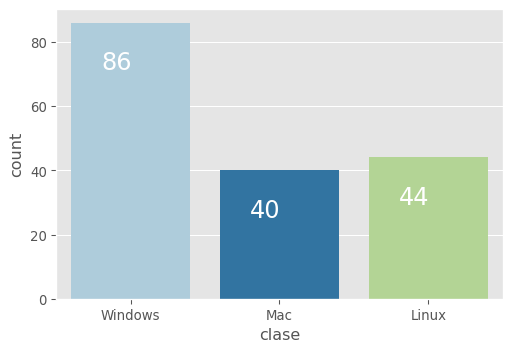

In [24]:
g = sns.countplot(data['clase'], palette="Paired")
g.set_xticklabels(['Windows','Mac','Linux'])
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=18)
plt.show();

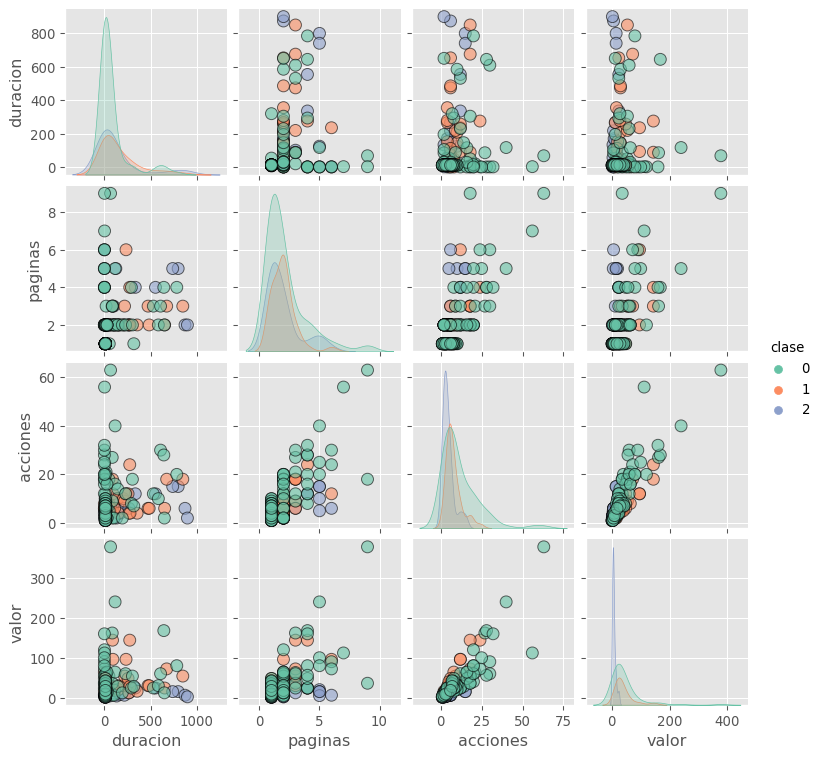

In [25]:
ax=sns.pairplot(data, hue = 'clase', diag_kind = 'kde', palette='Set2',
                plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                height = 2, size = 2);
plt.show();

In [26]:
X=data[['duracion', 'paginas', 'acciones', 'valor']] 
y=data['clase']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify = data['clase'], 
                                                    random_state = 17)

In [27]:
clases = ['Windows','Mac','Linux']

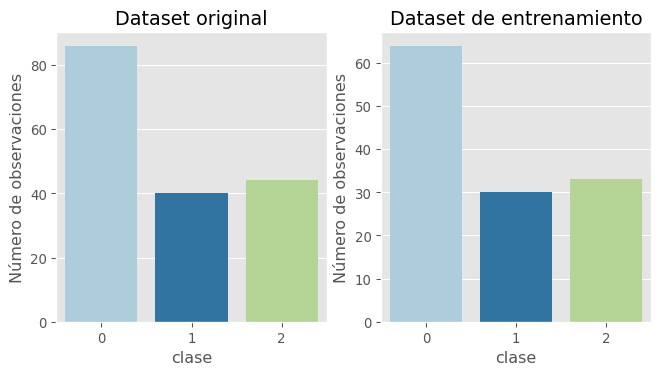

In [28]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8,4))

sns.countplot(data['clase'], ax=ax[0], palette="Paired").set(title='Dataset original')
ax[0].set_ylabel("Número de observaciones")
sns.countplot(y_train, ax=ax[1], palette="Paired").set(title='Dataset de entrenamiento')
ax[1].set_ylabel("Número de observaciones")
fig.show();

In [29]:
classes = np.unique(y_train)
cw = class_weight.compute_class_weight('balanced', classes, y_train)
weights = dict(zip(classes,cw))

In [30]:
cw

array([0.66145833, 1.41111111, 1.28282828])

In [31]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, 
                           max_leaf_nodes=16,
                           max_depth=40,
                           n_jobs=-1,
                           class_weight=weights,
                           random_state = 17)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  4  3]
 [ 2  8  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.67      0.80      0.73        10
           2       0.79      1.00      0.88        11

    accuracy                           0.79        43
   macro avg       0.78      0.83      0.79        43
weighted avg       0.81      0.79      0.79        43



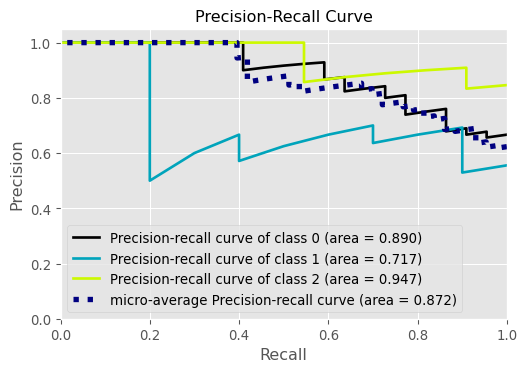

In [33]:
y_score = clf.predict_proba(X_test)
plot_precision_recall(y_test, y_score)
plt.show()

In [34]:
clf.feature_importances_

array([0.18801163, 0.100325  , 0.2591173 , 0.45254607])

In [35]:
data['acc_pag']=data['acciones']/data['paginas']

In [36]:
X=data[['duracion', 'acciones', 'valor', 'acc_pag']]  

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify = y, 
                                                    random_state = 17)

In [38]:
clf=RandomForestClassifier(n_estimators=400,
                           min_samples_split=6,
                           max_leaf_nodes=13,
                           max_depth=7,
                           min_samples_leaf=6,
                           oob_score=True,
                           max_features='log2',
                           n_jobs=-1,
                           class_weight=weights,
                           ccp_alpha=0.002,
                           random_state = 17)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [39]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15  3  4]
 [ 0 10  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        22
           1       0.77      1.00      0.87        10
           2       0.73      1.00      0.85        11

    accuracy                           0.84        43
   macro avg       0.83      0.89      0.84        43
weighted avg       0.88      0.84      0.83        43



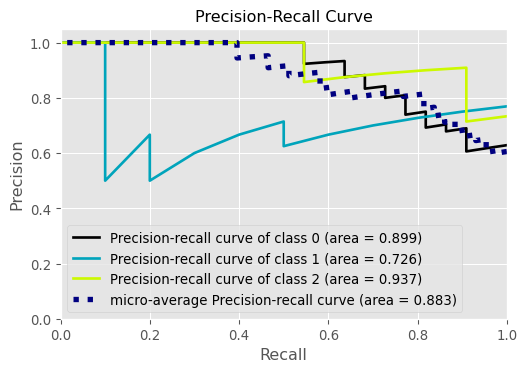

In [40]:
y_score = clf.predict_proba(X_test)
plot_precision_recall(y_test, y_score)
plt.show()

In [41]:
data_validacion=pd.read_csv('data_validation_without_class.csv')
data_validacion['acc_pag']=data_validacion['acciones']/data_validacion['paginas']
data_validacion=data_validacion[['duracion', 'acciones', 'valor', 'acc_pag']] 
data_validacion

,duracion,acciones,valor,acc_pag
0,164,6,15,3.0
1,173,5,9,2.5
2,26,4,8,2.0
3,13,10,42,10.0
4,12,2,15,2.0
5,13,8,9,8.0
6,13,7,28,7.0
7,32,4,20,2.0
8,45,18,112,6.0
9,89,12,18,6.0


In [42]:
validacion=clf.predict(data_validacion)
validacion

array([2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)